/Users/labuser/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


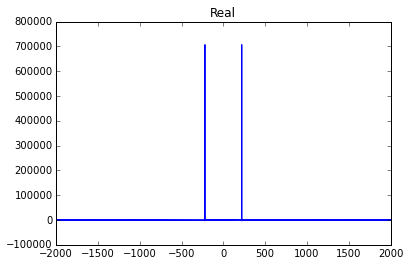

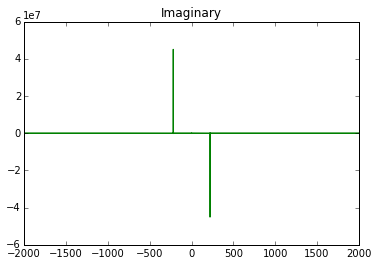

(array([ 0.00000000  +0.j        ,  0.00120557 -33.84618519j,
        -0.00759987+106.68290971j, ...,  0.00489217 +45.78242297j,
        -0.00759987-106.68290971j,  0.00120557 +33.84618519j]),
 array([ 0. ,  0.5,  1. , ..., -1.5, -1. , -0.5]))

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os
import numpy as np


class Tone:
    
    def __init__(self):
                 #, f, dur, sr, signal, orig_signal, overtones, OT_num)
        self.f = 0 #int #frequency
        self.dur = 0 #int #duration
        self.sr = 44100 #int #sampling rate 
        self.signal = 0 #numpy array #stores the tone plus the overtones
        self.orig_signal = 0 #numpy array #stores the simple one-frequency tone with frequency f1
        self.overtones = {} #dictionary #stores overtones #
                            #key: a number of multiples of f1 #value: an overtone numpy array
        self.OT_num = 0 #the number of overtones present
                        #should increase by one each time a new overtone is created
    
    def playsound(self, outside_signal = None, sr = 44100, vol = 1):
        from scipy.io.wavfile import write
        import os
        if outside_signal == None:
            write('tmp.wav', self.sr, self.signal)
            os.system("afplay tmp.wav") 
            os.system("rm tmp.wav") 
        else:
            self.signal == outside_signal
            os.system("afplay tmp.wav") 
            os.system("rm tmp.wav") 
        return
    
    def get_tone(self, f, dur, play_sound = False):
        self.f = f
        self.dur = dur
        amp = 2**10
        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        self.orig_signal = np.int16(amp*np.sin(np.pi*2*self.f*time_pts))
        self.signal = self.orig_signal
        if play_sound == True:
            self.playsound(self.orig_signal)
        return self.orig_signal #numpy array #generated tone 
    
    def get_overtone(self, multi, play_sound = False):
        fr = multi*self.f
        amp = 2**10
        time_pts = np.linspace(0, self.dur, self.dur*self.sr)
        over_tone = np.int16(amp*np.sin(np.pi*2*fr*time_pts))
        self.overtones[fr] = over_tone
        self.OT_num += 1
        if play_sound == True:
            self.playsound(self.over_tone)
        return None
    
    def comb_tones(self): #needs weights
        weight_overtones = {}
        sum_squares = 0
        self.overtones[self.f] = self.orig_signal
        for key in self.overtones.iterkeys():
            weight_overtones[key] = int(raw_input('Input the weight of the ' + str(key) + ' Hz tone')) 
        weight_overtones[self.f] = int(raw_input('Input the weight of the fundamental frequency:'))
        for k in weight_overtones.iterkeys():
            sum_squares += weight_overtones[k]**2
        norm_fac = 1./np.sqrt(sum_squares)
        for k in self.overtones.iterkeys():
            self.signal += norm_fac*(self.overtones[k])*(weight_overtones[k])
        return self.signal
        
    def plot_fourier(self, sample_rate = 44100, freq_lim = 2000., amp_lim = 1e7):
        ft = np.fft.fft(np.float64(self.signal))
        self.f = np.fft.fftfreq(self.signal.shape[-1], d = 1./sample_rate)
        plt.figure()
        plt.title('Real')
        plt.plot(self.f, ft.real, 'b-')
        plt.xlim([-freq_lim, freq_lim])
        plt.figure()
        plt.title('Imaginary')
        plt.plot(self.f, ft.imag, 'g-')
        plt.xlim([-freq_lim, freq_lim])
        plt.show()
    
        return ft, self.f
    
    def plot_sound(self, 
    
test = Tone()
#test.get_tone(220, 2)
#test.get_overtone(3)
#test.get_overtone(4)
#test.comb_tones()

test.get_tone(220, 2, play_sound = True)


test.plot_fourier()
